In [1]:
import numpy as np  
import pandas as pd      
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score, mean_squared_error
from sklearn.model_selection import train_test_split   

import matplotlib.pyplot as plt

import statsmodels.api as sm
import seaborn as sns

# Linear Regression

In [2]:
wine_quality = pd.read_csv("winequality-white.csv",sep=';')  
# Step for converting white space in columns to _ value for better handling 

In [3]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Step for converting white space in columns to _ value for better handling 

In [4]:
wine_quality.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [5]:
wine_quality.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


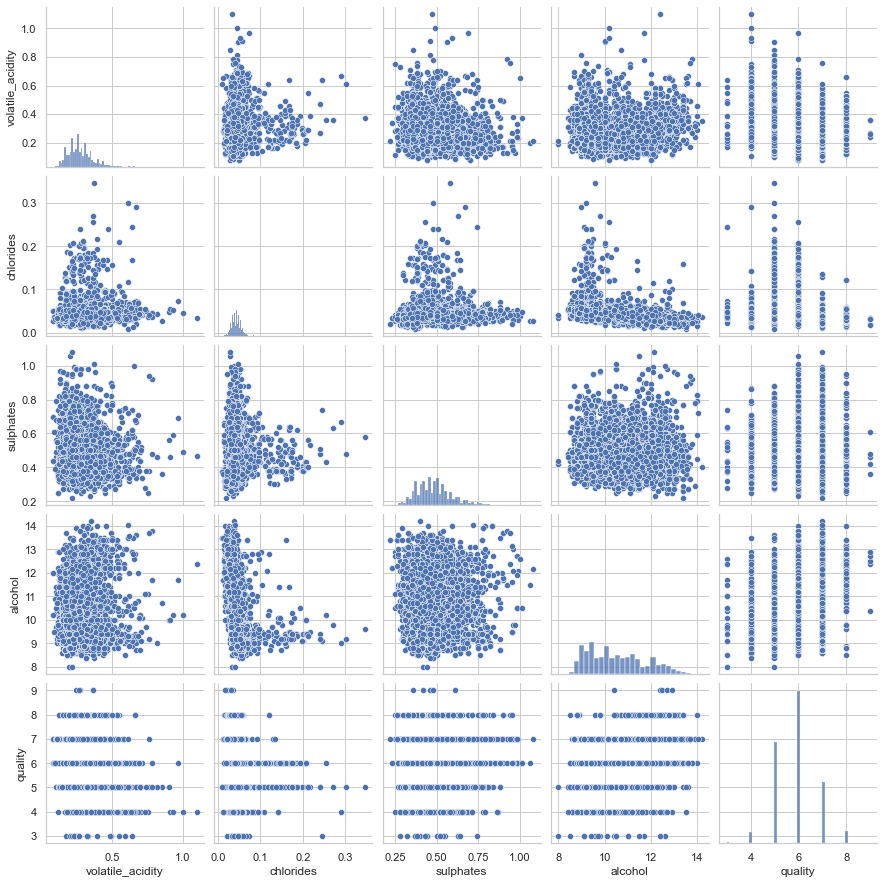

In [6]:
# Plots - pair plots
eda_colnms = [ 'volatile_acidity',  'chlorides', 'sulphates', 'alcohol','quality']
sns.set(style='whitegrid',context = 'notebook')
sns.pairplot(wine_quality[eda_colnms],height = 2.5,x_vars= eda_colnms,y_vars=eda_colnms)
plt.show()

# Multi linear regression model

In [7]:
colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[colnms]
pdy = wine_quality["quality"]

print("wine_quality type= ", type(wine_quality))
print("pdx type= ", type(pdx))
print("pdy type= ", type(pdy))

wine_quality type=  <class 'pandas.core.frame.DataFrame'>
pdx type=  <class 'pandas.core.frame.DataFrame'>
pdy type=  <class 'pandas.core.series.Series'>


In [8]:
pdx.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [9]:
pdy.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [10]:
x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)

#random.seed(434)
full_mod = sm.OLS(y_train,x_train_new)
full_res = full_mod.fit()
print ("\n \n",full_res.summary())


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     124.7
Date:                Mon, 25 Oct 2021   Prob (F-statistic):          8.20e-241
Time:                        18:35:41   Log-Likelihood:                -3895.2
No. Observations:                3428   AIC:                             7814.
Df Residuals:                    3416   BIC:                             7888.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  131.0

In [11]:
y_pred_new = full_res.predict(x_test_new)
mse_OLS_all_variables = mean_squared_error(y_test, y_pred_new)
print("mse_OLS_all_variables:",round(mse_OLS_all_variables,4))

mse_OLS_all_variables: 0.5543


If VIF <= 4 suggests no multi-collinearity, in banking scenarios, people use VIF <= 2 also!

In [12]:
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
fixed_acidity 2.615
volatile_acidity 1.132
citric_acid 1.171
residual_sugar 12.087
chlorides 1.225
free_sulfur_dioxide 1.777
total_sulfur_dioxide 2.202
density 25.78
pH 2.137
sulphates 1.132
alcohol 6.899


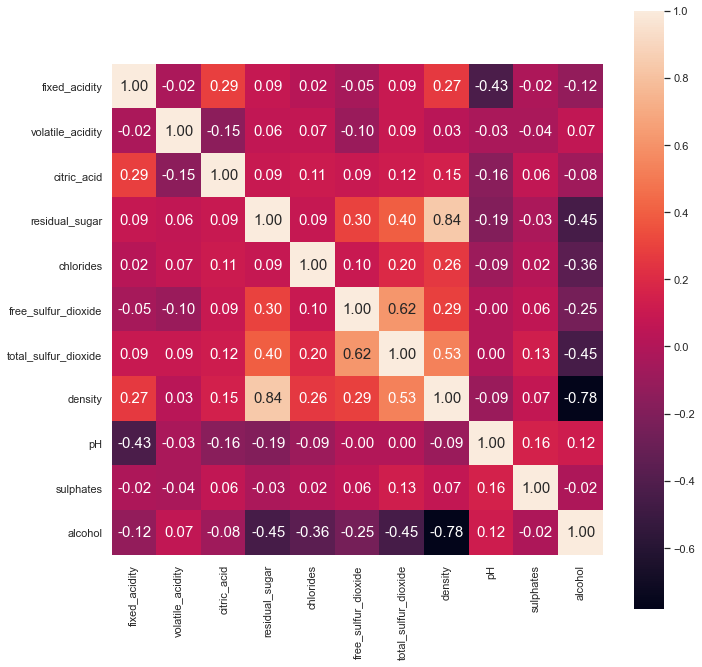

In [13]:
# Correlation coefficients
corr_mat = np.corrcoef(wine_quality[colnms].values.T)
sns.set(font_scale=1)
sns.set(rc={"figure.figsize":(11, 11)})
full_mat = sns.heatmap(corr_mat, cbar=True, annot=True, square=True,
fmt='.2f',annot_kws={'size': 15}, yticklabels=colnms,
xticklabels=colnms)
plt.show()

#  Backward Elimination

In [14]:
colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


for i in np.arange(len(colnms)):
    pdx = wine_quality[colnms]
    pdy = wine_quality["quality"]

    x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
    x_train_new = sm.add_constant(x_train)
    x_test_new = sm.add_constant(x_test)

    #random.seed(434)
    full_mod = sm.OLS(y_train,x_train_new)
    full_res = full_mod.fit()
    
    y_pred_new = full_res.predict(x_test_new)
    mse_full_res = mean_squared_error(y_test, y_pred_new)
    

    if np.amax(full_res.pvalues) > 0.05:
        pop_par = full_res.pvalues.keys()[np.where(full_res.pvalues.values == np.amax(full_res.pvalues.values))[0][0]]
        print("\n","Step:",i+1,"Coefficient Removed:",pop_par,"p-value:",np.amax(full_res.pvalues),"mse:",mse_full_res)
        colnms.pop(np.where(full_res.pvalues.values == np.amax(full_res.pvalues.values))[0][0]-1)
    else:
        break


 Step: 1 Coefficient Removed: total_sulfur_dioxide p-value: 0.7080127764740939 mse: 0.5542927330136792

 Step: 2 Coefficient Removed: chlorides p-value: 0.6656381478548582 mse: 0.5544462324396171

 Step: 3 Coefficient Removed: citric_acid p-value: 0.47457989997893335 mse: 0.5540760907108204


In [15]:
print ("\n \n",full_res.summary())


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     171.5
Date:                Mon, 25 Oct 2021   Prob (F-statistic):          6.02e-244
Time:                        18:36:13   Log-Likelihood:                -3895.7
No. Observations:                3428   AIC:                             7809.
Df Residuals:                    3419   BIC:                             7865.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 132.4110

If VIF <= 4 suggests no multi-collinearity, in banking scenarios, people use VIF <= 2 also!

In [16]:
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
fixed_acidity 2.495
volatile_acidity 1.062
residual_sugar 11.42
free_sulfur_dioxide 1.162
density 24.054
pH 2.062
sulphates 1.124
alcohol 6.829


In [17]:
#mean_squared_error
print ("\nTest MSE value:",round(mse_full_res,4))


Test MSE value: 0.5535


# Ridge Regression

In [18]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]


In [19]:
x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)

alphas = [1e-4,1e-3,1e-2,0.1,0.5,1.0,5.0,10.0]

initrsq = [0]
ridge_alpha=[]
ridge_test_rsq=[]
ridge_mse = []

# print ("\nRidge Regression: Best Parameters\n")
for alph in alphas:
    ridge_reg = Ridge(alpha=alph) 
    ridge_reg.fit(x_train,y_train)    
    tr_rsqrd = ridge_reg.score(x_train,y_train)
    ts_rsqrd = ridge_reg.score(x_test,y_test)  
    ridge_y_test_pred=ridge_reg.predict(x_test)
    mse = mean_squared_error(y_test, ridge_y_test_pred)

    print("alpha",alph,"   test R2",ts_rsqrd, "   MSE =", mse)
    ridge_alpha.append(alph)
    ridge_test_rsq.append(ts_rsqrd)
    ridge_mse.append(mse)

    if ts_rsqrd > initrsq:
        print ("Lambda: ",alph,"Train R-Squared value:",round(tr_rsqrd,5),"Test R-squared value:",round(ts_rsqrd,5),"Test MSE:",mse)
        initrsq = ts_rsqrd
        best_alpha = alph

alpha 0.0001    test R2 0.26531048494839826    MSE = 0.5547142133337619
Lambda:  0.0001 Train R-Squared value: 0.28653 Test R-squared value: 0.26531 Test MSE: 0.5547142133337619
alpha 0.001    test R2 0.2616719233872249    MSE = 0.5574614443377746
alpha 0.01    test R2 0.25550952185414766    MSE = 0.5621142556936405
alpha 0.1    test R2 0.25388203309933854    MSE = 0.5633430620476689
alpha 0.5    test R2 0.2537379368063154    MSE = 0.563451859383402
alpha 1.0    test R2 0.253781623972653    MSE = 0.5634188741677275
alpha 5.0    test R2 0.25409656538998604    MSE = 0.5631810832683299
alpha 10.0    test R2 0.25355183350922494    MSE = 0.5635923733582572


<ipython-input-20-c0da8f37bfbf>:3: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.semilogy(basey=10)


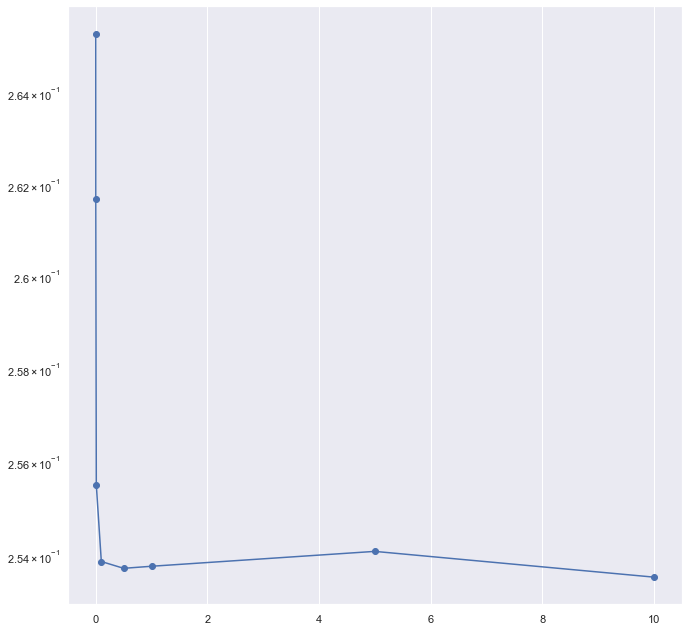

In [20]:
plt.scatter(ridge_alpha,ridge_test_rsq)
plt.plot(ridge_alpha,ridge_test_rsq)
plt.semilogy(basey=10)
plt.show()

### Search for your chosen alpha here

In [21]:
# Coeffients of Ridge regression of best alpha value

alpha = 0.0001
ridge_reg = Ridge(alpha= alpha) 
ridge_reg.fit(x_train,y_train) 

Ridge(alpha=0.0001)

In [22]:
print ("\nRidge Regression coefficient values of Alpha =",alpha,"\n")
for i in range(11):
    print (all_colnms[i],": ",ridge_reg.coef_[i])


Ridge Regression coefficient values of Alpha = 0.0001 

fixed_acidity :  0.04447884081530731
volatile_acidity :  -1.9360401489516141
citric_acid :  -0.08870675229783019
residual_sugar :  0.07089680141939544
chlorides :  0.23816003252303386
free_sulfur_dioxide :  0.0046978992525379725
total_sulfur_dioxide :  -0.00020806906962054147
density :  -121.26085912125367
pH :  0.6114724717715516
sulphates :  0.6769084140937001
alcohol :  0.2373394538960599


In [23]:
ridge_y_test_pred=ridge_reg.predict(x_test)

# R-square calculation
rsqd = r2_score(y_test, ridge_y_test_pred)
print ("\nTest R-squared value:",round(rsqd,4))

#mean_squared_error
mse = mean_squared_error(y_test, ridge_y_test_pred)
print ("\nTest MSE value:",round(mse,4))


Test R-squared value: 0.2653

Test MSE value: 0.5547


# Lasso Regression

In [24]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)

alphas = [1e-4,1e-3,1e-2,0.1,0.5,1.0,5.0,10.0]
initrsq = 0
print ("\nLasso Regression: Best Parameters\n")

initrsq = [0]
lasso_alpha=[]
lasso_test_rsq=[]
lasso_mse = []

for alph in alphas:
    lasso_reg = Lasso(alpha=alph) 
    lasso_reg.fit(x_train,y_train)    
    tr_rsqrd = lasso_reg.score(x_train,y_train)
    ts_rsqrd = lasso_reg.score(x_test,y_test)    
    lasso_y_test_pred=lasso_reg.predict(x_test)
    mse = mean_squared_error(y_test, lasso_y_test_pred)

    print("alpha",alph,"   test R2",ts_rsqrd, "   MSE =", mse)
    lasso_alpha.append(alph)
    lasso_test_rsq.append(ts_rsqrd)
    lasso_mse.append(mse)

    
    if ts_rsqrd > initrsq:
        print ("Lambda: ",alph,"Train R-Squared value:",round(tr_rsqrd,5),"Test R-squared value:",round(ts_rsqrd,5),"Test MSE:",mse)
        initrsq = ts_rsqrd



Lasso Regression: Best Parameters

alpha 0.0001    test R2 0.25335093546260745    MSE = 0.5637440578448418
Lambda:  0.0001 Train R-Squared value: 0.27882 Test R-squared value: 0.25335 Test MSE: 0.5637440578448418
alpha 0.001    test R2 0.2545765977506387    MSE = 0.5628186433969845
Lambda:  0.001 Train R-Squared value: 0.2784 Test R-squared value: 0.25458 Test MSE: 0.5628186433969845
alpha 0.01    test R2 0.24492793942885804    MSE = 0.5701036907551421
alpha 0.1    test R2 0.20013673470105287    MSE = 0.6039224909228712
alpha 0.5    test R2 0.05352873276333536    MSE = 0.714616247669357
alpha 1.0    test R2 0.04739580078497285    MSE = 0.719246808563598
alpha 5.0    test R2 0.010413089525044938    MSE = 0.7471699450222145
alpha 10.0    test R2 -0.0011619661806652193    MSE = 0.7559094843630426


In [25]:
# Coeffients of Lasso regression of best alpha value
alpha = 0.01
lasso_reg = Lasso(alpha=alpha) 
lasso_reg.fit(x_train,y_train) 

Lasso(alpha=0.01)

In [26]:
print ("\nLasso Regression coefficient values of Alpha =",alpha,"\n")
for i in range(11):
    print (all_colnms[i],": ",lasso_reg.coef_[i])



Lasso Regression coefficient values of Alpha = 0.01 

fixed_acidity :  -0.05226892293369556
volatile_acidity :  -1.0046650143233669
citric_acid :  -0.0
residual_sugar :  0.019476900896846085
chlorides :  -0.0
free_sulfur_dioxide :  0.007100534597078791
total_sulfur_dioxide :  -0.0011724749815946256
density :  -0.0
pH :  0.0
sulphates :  0.0
alcohol :  0.3526233590572668


In [27]:
lasso_y_test_pred=lasso_reg.predict(x_test)

# R-square calculation
rsqd = r2_score(y_test, lasso_y_test_pred)
print ("\nTest R-squared value:",round(rsqd,4))

#mean_squared_error
mse = mean_squared_error(y_test, lasso_y_test_pred)
print ("\nTest MSE value:",round(mse,4))


Test R-squared value: 0.2449

Test MSE value: 0.5701


#  Comparison

In [28]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

In [29]:
type(x_train)

pandas.core.frame.DataFrame

In [30]:
alphas = [1e-4,1e-3,1e-2,0.1,0.5,1.0,5.0,10,20]
initrsq = 0

lasso_mse_train = []
lasso_mse_test = []

ridge_mse_train = []
ridge_mse_test = []

for alph in alphas:
        lasso_reg = Lasso(alpha=alph) 
        lasso_reg.fit(x_train,y_train) 

        lasso_y_train_pred = lasso_reg.predict(x_train)
        lasso_y_test_pred = lasso_reg.predict(x_test)

        ridge_reg = Ridge(alpha=alph)
        ridge_reg.fit(x_train,y_train) 

        ridge_y_train_pred = ridge_reg.predict(x_train)
        ridge_y_test_pred = ridge_reg.predict(x_test)

        #Calculate quality of predictors

        tr_lasso_mse = mean_squared_error(y_train, lasso_y_train_pred)
        ts_lasso_mse = mean_squared_error(y_test, lasso_y_test_pred)

        tr_ridge_mse = mean_squared_error(y_train, ridge_y_train_pred)
        ts_ridge_mse = mean_squared_error(y_test, ridge_y_test_pred)

        #append quality metrics

        lasso_mse_train.append(tr_lasso_mse)
        lasso_mse_test.append(ts_lasso_mse)

        ridge_mse_train.append(tr_ridge_mse)
        ridge_mse_test.append(ts_ridge_mse)

    



In [31]:
zipped = list(zip(alphas, lasso_mse_train,lasso_mse_test,ridge_mse_train,ridge_mse_test))
df = pd.DataFrame(zipped, columns=['lambda', 'lasso_mse_train','lasso_mse_test','ridge_mse_train','ridge_mse_test'])
print(df)

    lambda  lasso_mse_train  lasso_mse_test  ridge_mse_train  ridge_mse_test
0   0.0001         0.574373        0.563744         0.568237        0.554714
1   0.0010         0.574708        0.562819         0.569444        0.557461
2   0.0100         0.589762        0.570104         0.573079        0.562114
3   0.1000         0.633311        0.603922         0.574200        0.563343
4   0.5000         0.758293        0.714616         0.574329        0.563452
5   1.0000         0.765291        0.719247         0.574376        0.563419
6   5.0000         0.789668        0.747170         0.575108        0.563181
7  10.0000         0.796438        0.755909         0.576681        0.563592
8  20.0000         0.796438        0.755909         0.580448        0.565529


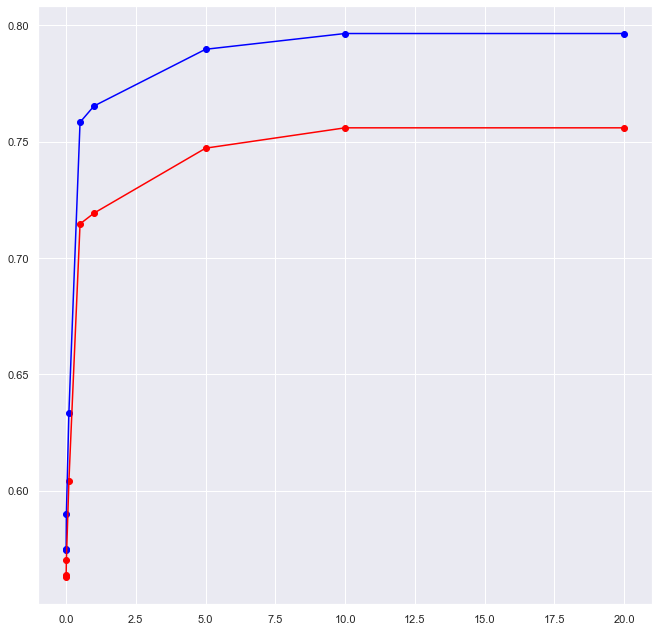

In [32]:
plt.plot(alphas,lasso_mse_train,color='blue')
plt.scatter(alphas,lasso_mse_train,color='blue')
plt.plot(alphas,lasso_mse_test,color='red')
plt.scatter(alphas,lasso_mse_test,color='red')
plt.show()

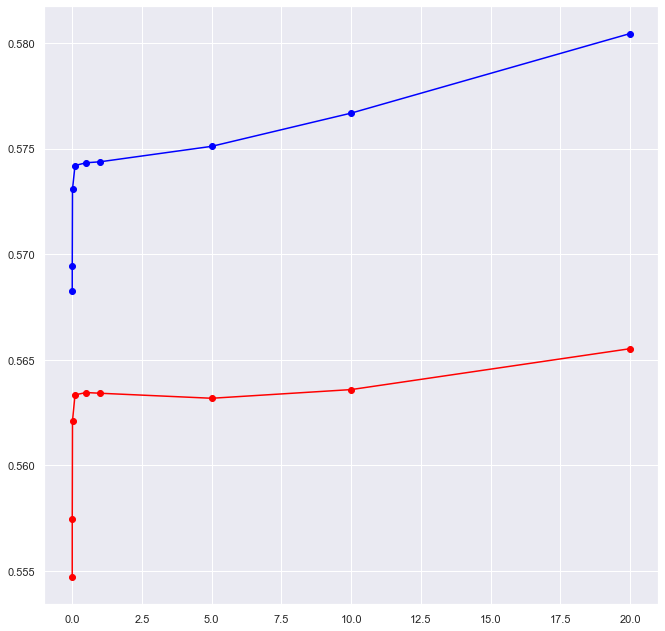

In [33]:
plt.plot(alphas,ridge_mse_train,color='blue')
plt.scatter(alphas,ridge_mse_train,color='blue')
plt.plot(alphas,ridge_mse_test,color='red')
plt.scatter(alphas,ridge_mse_test,color='red')
plt.show()

## Which model would you choose?

In [58]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

# Coeffients of Lasso regression
lasso_reg = Lasso(alpha=1) 
lasso_reg.fit(x_train,y_train) 

lasso_y_test_pred = lasso_reg.predict(x_test)

print ("\nLasso Regression coefficient values of Alpha = 1\n")
for i in range(11):
    print (all_colnms[i],": ",lasso_reg.coef_[i])
    
print("\n \n mse =", round(mean_squared_error(y_test, lasso_y_test_pred),4))


Lasso Regression coefficient values of Alpha = 1

fixed_acidity :  -0.0
volatile_acidity :  -0.0
citric_acid :  -0.0
residual_sugar :  -0.0
chlorides :  -0.0
free_sulfur_dioxide :  0.0034663890528231216
total_sulfur_dioxide :  -0.00373075304965191
density :  -0.0
pH :  0.0
sulphates :  0.0
alcohol :  0.0

 
 mse = 0.7192


In [59]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

# Coeffients of Lasso regression
lasso_reg = Lasso(alpha=0.1) 
lasso_reg.fit(x_train,y_train) 

lasso_y_test_pred = lasso_reg.predict(x_test)

print ("\nLasso Regression coefficient values of Alpha = 0.1\n")
for i in range(11):
    print (all_colnms[i],": ",lasso_reg.coef_[i])
    
print("\n \n mse =", round(mean_squared_error(y_test, lasso_y_test_pred),4))


Lasso Regression coefficient values of Alpha = 0.1

fixed_acidity :  -0.0
volatile_acidity :  -0.0
citric_acid :  -0.0
residual_sugar :  0.0059378852154836825
chlorides :  -0.0
free_sulfur_dioxide :  0.009060912601821517
total_sulfur_dioxide :  -0.002583352467192921
density :  -0.0
pH :  0.0
sulphates :  0.0
alcohol :  0.25177122420321946

 
 mse = 0.6039


In [60]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

# Coeffients of Lasso regression
lasso_reg = Lasso(alpha=0.01) 
lasso_reg.fit(x_train,y_train) 

lasso_y_test_pred = lasso_reg.predict(x_test)

print ("\nLasso Regression coefficient values of Alpha = 0.01\n")
for i in range(11):
    print (all_colnms[i],": ",lasso_reg.coef_[i])
    
print("\n \n mse =", round(mean_squared_error(y_test, lasso_y_test_pred),4))


Lasso Regression coefficient values of Alpha = 0.01

fixed_acidity :  -0.05226892293369556
volatile_acidity :  -1.0046650143233669
citric_acid :  -0.0
residual_sugar :  0.019476900896846085
chlorides :  -0.0
free_sulfur_dioxide :  0.007100534597078791
total_sulfur_dioxide :  -0.0011724749815946256
density :  -0.0
pH :  0.0
sulphates :  0.0
alcohol :  0.3526233590572668

 
 mse = 0.5701


In [61]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

# Coeffients of Lasso regression
lasso_reg = Lasso(alpha=0.001) 
lasso_reg.fit(x_train,y_train) 

lasso_y_test_pred = lasso_reg.predict(x_test)

print ("\nLasso Regression coefficient values of Alpha = 0.001\n")
for i in range(11):
    print (all_colnms[i],": ",lasso_reg.coef_[i])
    
print("\n \n mse =", round(mean_squared_error(y_test, lasso_y_test_pred),4))


Lasso Regression coefficient values of Alpha = 0.001

fixed_acidity :  -0.0550261237237345
volatile_acidity :  -1.9283268117005787
citric_acid :  -0.0483873112535744
residual_sugar :  0.024334951911940402
chlorides :  -0.0
free_sulfur_dioxide :  0.005701490105325006
total_sulfur_dioxide :  -0.0007218957947853128
density :  -0.0
pH :  0.14510628340397794
sulphates :  0.427881704951357
alcohol :  0.37259062844792995

 
 mse = 0.5628


In [62]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

# Coeffients of Lasso regression
lasso_reg = Lasso(alpha=0.0001) 
lasso_reg.fit(x_train,y_train) 

lasso_y_test_pred = lasso_reg.predict(x_test)

print ("\nLasso Regression coefficient values of Alpha = 0.0001\n")
for i in range(11):
    print (all_colnms[i],": ",lasso_reg.coef_[i])
    
print("\n \n mse =", round(mean_squared_error(y_test, lasso_y_test_pred),4))


Lasso Regression coefficient values of Alpha = 0.0001

fixed_acidity :  -0.05094045294921122
volatile_acidity :  -2.0270092625299503
citric_acid :  -0.12618379790893372
residual_sugar :  0.024984240062654376
chlorides :  -0.12161808855986611
free_sulfur_dioxide :  0.005595195147013643
total_sulfur_dioxide :  -0.0006757505631753386
density :  -0.0
pH :  0.17675716585513152
sulphates :  0.4928600036137688
alcohol :  0.3739566477554636

 
 mse = 0.5637


In [43]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

# Coeffients of Lasso regression
ridge_reg = Ridge(alpha=1e-2) 
ridge_reg.fit(x_train,y_train) 

ridge_y_test_pred = ridge_reg.predict(x_test)

print ("\nRidge Regression coefficient values of Alpha = 0.001\n")
for i in range(11):
    print (all_colnms[i],": ",ridge_reg.coef_[0][i])
    
print("\n \n mse =", round(mean_squared_error(y_test, ridge_y_test_pred),4))


Ridge Regression coefficient values of Alpha = 0.001

fixed_acidity :  -0.039746835352718425
volatile_acidity :  -2.0211978947357028
citric_acid :  -0.12489561966875977
residual_sugar :  0.030358055586379405
chlorides :  -0.2889955734040872
free_sulfur_dioxide :  0.005480183244153543
total_sulfur_dioxide :  -0.0006114107012425565
density :  -14.310882275174349
pH :  0.2287127630462244
sulphates :  0.5210225796196951
alcohol :  0.3566072447778279

 
 mse = 0.5621


In [44]:
print("OLS backward elimination parameters\n\n",full_res.params,"\n\n MSE = ",round(mse_full_res,4))

OLS backward elimination parameters

 const                  132.411003
fixed_acidity            0.048511
volatile_acidity        -1.921205
residual_sugar           0.074736
free_sulfur_dioxide      0.004363
density               -132.511170
pH                       0.646739
sulphates                0.682848
alcohol                  0.224006
dtype: float64 

 MSE =  0.5535


In [45]:


print("mse_OLS_all_variables:",round(mse_OLS_all_variables,4))

mse_OLS_all_variables: 0.5543
